In [226]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam, SGD
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [272]:
train_dataset, test_dataset = mnist.load_data()
def preprocess(dataset):
    
    xs, ys = dataset
    xs = xs / 255
    xs = np.expand_dims(xs, axis=3)
    ys = to_categorical(ys, 10)
    return xs, ys
xs_train, ys_train = preprocess(train_dataset)
xs_test, ys_test = preprocess(test_dataset)

In [274]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# model.add(MaxPool2D(2))
model.add(Conv2D(4, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(49))
model.add(Reshape((7,7,1)))
model.add(Conv2DTranspose(4, kernel_size=(3,3), padding='same', strides=(2,2),  activation='relu'))
model.add(Conv2DTranspose(1, kernel_size=(3,3), padding='same', strides=(2,2),  activation='relu'))
# model.add(Conv2DTranspose(1, kernel_size=(3,3), padding='same', strides=(2,2),  activation='relu'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 24, 24, 4)         292       
_________________________________________________________________
flatten_35 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 49)                112945    
_________________________________________________________________
reshape_33 (Reshape)         (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_transpose_106 (Conv2D (None, 14, 14, 4)         40        
_________________________________________________________________
conv2d_transpose_107 (Conv2D (None, 28, 28, 1)         37        
Total para

In [275]:
model.compile(optimizer=Adam(lr=0.01), loss='mse', metrics=['acc'])

In [284]:
model.fit(xs_train, xs_train)

Epoch 1/1
60000/60000 [==============================] - 26s 431us/step - loss: 0.0207 - acc: 0.8090


In [210]:
model.evaluate(xs_test, xs_test)

10000/10000 [==============================] - 2s 178us/step


[7410.1257703125, 0.8072424739837647]

In [266]:
def visualize(img):
    fig = plt.figure(figsize=(8, 8))
    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    img = np.expand_dims(img, axis=3)
    predicted_img = model.predict(np.array([img]))[0]
    predicted_img = np.squeeze(predicted_img)
    fig.add_subplot(1,2,2)
    plt.imshow(predicted_img, cmap='gray', vmin=0, vmax=1)
    

1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


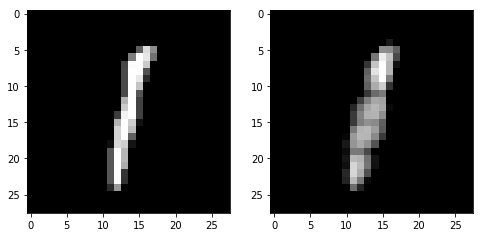

In [295]:
xs, ys = xs_test, ys_test
index = np.random.randint(0,len(xs))
img = np.squeeze(xs[index])
print(np.argmax(ys[index]))
visualize(img)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


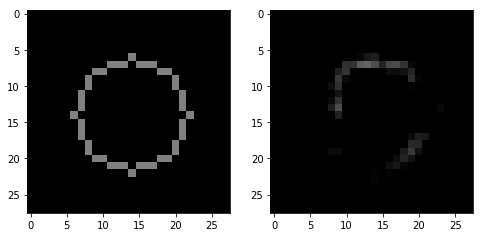

In [283]:
img = np.zeros((28,28))
img = cv2.circle(img, (14,14), 8, 0.5)
visualize(img)

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      